<b>Target :</b> To reduce overfitting by including dropout = 0.1<br>
<b>Results :</b> The gap between train and test accuracies has reduced but the overall performance has fallen to 98%<br>
<b>Analysis :</b> To improve test accuracy, I have to improve the train accuracy by improving the learning capacity of the model. I am going to try 1. Increasing the number of kernels if possible 2. Add image augmentation 3. trying a step learning scheduler

# Import Libraries

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

## Data Transformations


In [2]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])


# Dataset and Creating Train/Test Split

In [3]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

100%|██████████| 9912422/9912422 [00:00<00:00, 280358145.89it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 113635735.29it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 139396758.85it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 5395221.97it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



# Dataloader Arguments & Test/Train Dataloaders


In [4]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# View sample images

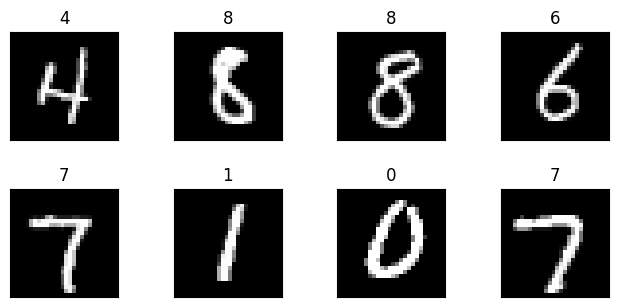

In [5]:
from utils import return_dataset_images

return_dataset_images(train_loader, 8)

# Model Params

In [6]:
from model_3 import Net, model_summary, model_train, model_test

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
model_summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
              ReLU-2           [-1, 16, 26, 26]               0
       BatchNorm2d-3           [-1, 16, 26, 26]              32
           Dropout-4           [-1, 16, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           2,304
              ReLU-6           [-1, 16, 24, 24]               0
       BatchNorm2d-7           [-1, 16, 24, 24]              32
           Dropout-8           [-1, 16, 24, 24]               0
            Conv2d-9            [-1, 8, 24, 24]             128
        MaxPool2d-10            [-1, 8, 12, 12]               0
           Conv2d-11           [-1, 16, 10, 10]           1,152
             ReLU-12           [-1, 16, 10, 10]               0
      BatchNorm2d-13           [-1, 16, 10, 10]              32
          Dropout-14           [-1, 16,

# Training and Testing

In [7]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    model_train(model, device, train_loader, optimizer, criterion)
    model_test(model, device, test_loader, criterion)

Epoch 1


Train: Loss=0.1132 Batch_id=468 Accuracy=84.52: 100%|██████████| 469/469 [00:16<00:00, 27.93it/s]


Test set: Average loss: 0.2184, Accuracy: 9372/10000 (93.72%)

Epoch 2


Train: Loss=0.0314 Batch_id=468 Accuracy=96.87: 100%|██████████| 469/469 [00:17<00:00, 27.02it/s]


Test set: Average loss: 0.0830, Accuracy: 9777/10000 (97.77%)

Epoch 3


Train: Loss=0.0739 Batch_id=468 Accuracy=97.65: 100%|██████████| 469/469 [00:16<00:00, 28.31it/s]


Test set: Average loss: 0.0581, Accuracy: 9836/10000 (98.36%)

Epoch 4


Train: Loss=0.1002 Batch_id=468 Accuracy=98.02: 100%|██████████| 469/469 [00:17<00:00, 27.28it/s]


Test set: Average loss: 0.0502, Accuracy: 9858/10000 (98.58%)

Epoch 5


Train: Loss=0.0234 Batch_id=468 Accuracy=98.28: 100%|██████████| 469/469 [00:16<00:00, 28.53it/s]


Test set: Average loss: 0.0456, Accuracy: 9876/10000 (98.76%)

Epoch 6


Train: Loss=0.0510 Batch_id=468 Accuracy=98.29: 100%|██████████| 469/469 [00:16<00:00, 28.24it/s]


Test set: Average loss: 0.0523, Accuracy: 9854/10000 (98.54%)

Epoch 7


Train: Loss=0.0605 Batch_id=468 Accuracy=98.47: 100%|██████████| 469/469 [00:16<00:00, 28.32it/s]


Test set: Average loss: 0.0405, Accuracy: 9887/10000 (98.87%)

Epoch 8


Train: Loss=0.0256 Batch_id=468 Accuracy=98.51: 100%|██████████| 469/469 [00:16<00:00, 28.28it/s]


Test set: Average loss: 0.0354, Accuracy: 9905/10000 (99.05%)

Epoch 9


Train: Loss=0.0104 Batch_id=468 Accuracy=98.58: 100%|██████████| 469/469 [00:16<00:00, 27.86it/s]


Test set: Average loss: 0.0402, Accuracy: 9874/10000 (98.74%)

Epoch 10


Train: Loss=0.0479 Batch_id=468 Accuracy=98.67: 100%|██████████| 469/469 [00:16<00:00, 28.81it/s]


Test set: Average loss: 0.0341, Accuracy: 9900/10000 (99.00%)

Epoch 11


Train: Loss=0.0538 Batch_id=468 Accuracy=98.69: 100%|██████████| 469/469 [00:17<00:00, 26.53it/s]


Test set: Average loss: 0.0403, Accuracy: 9885/10000 (98.85%)

Epoch 12


Train: Loss=0.0583 Batch_id=468 Accuracy=98.71: 100%|██████████| 469/469 [00:16<00:00, 28.01it/s]


Test set: Average loss: 0.0297, Accuracy: 9916/10000 (99.16%)

Epoch 13


Train: Loss=0.0281 Batch_id=468 Accuracy=98.80: 100%|██████████| 469/469 [00:17<00:00, 26.52it/s]


Test set: Average loss: 0.0283, Accuracy: 9925/10000 (99.25%)

Epoch 14


Train: Loss=0.0072 Batch_id=468 Accuracy=98.82: 100%|██████████| 469/469 [00:16<00:00, 28.12it/s]


Test set: Average loss: 0.0356, Accuracy: 9889/10000 (98.89%)

Epoch 15


Train: Loss=0.0295 Batch_id=468 Accuracy=98.84: 100%|██████████| 469/469 [00:17<00:00, 27.50it/s]


Test set: Average loss: 0.0382, Accuracy: 9894/10000 (98.94%)



# Graphs

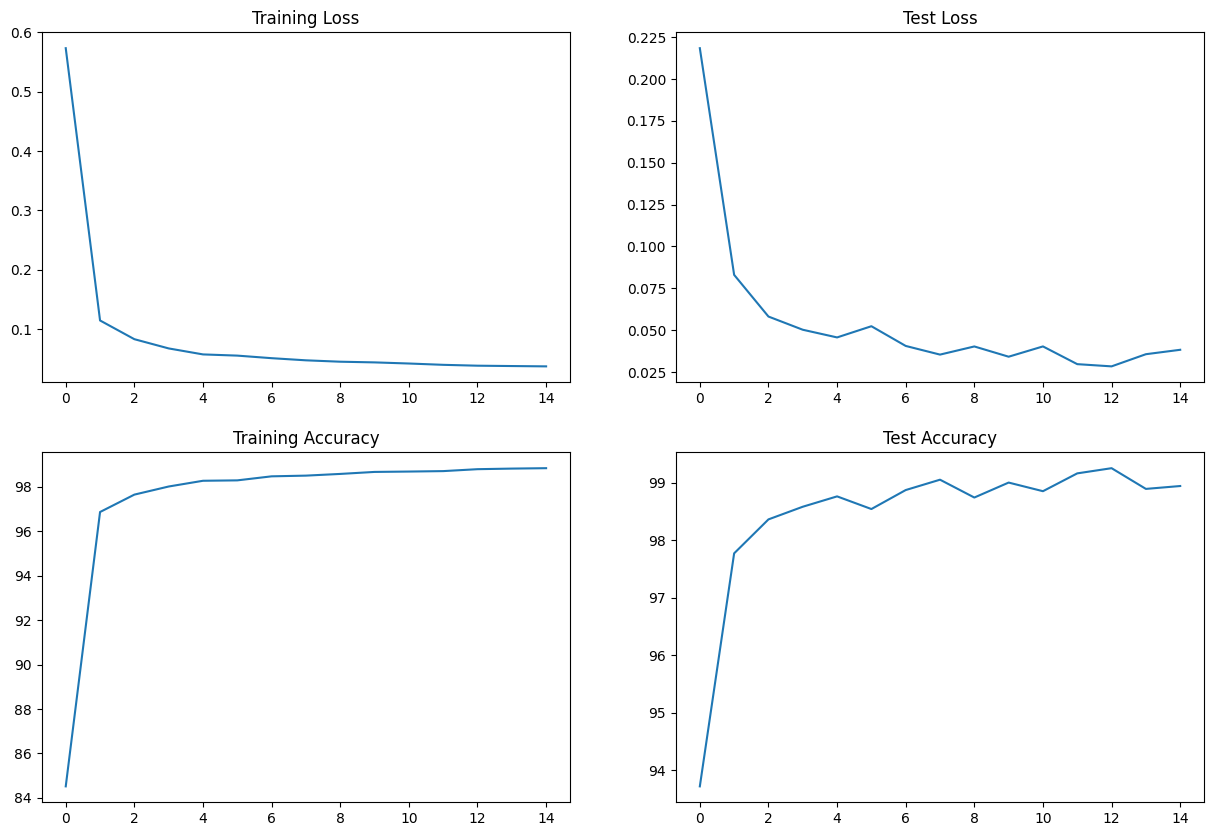

In [8]:
from model_3 import draw_graphs

draw_graphs()